# MODEL TRAINING

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [2]:
df = pd.read_csv('Loan_data.csv')

In [19]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,0
1,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,1
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,1
3,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,1
4,Male,Yes,2,Graduate,Yes,5417,4196.0,267,360,1,Urban,1


In [20]:
df.shape

(480, 12)

In [21]:
df.dtypes

Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int64
Loan_Amount_Term       int64
Credit_History         int64
Property_Area         object
Loan_Status            int64
dtype: object

In [22]:
x = df.drop('Loan_Status', axis = 1)
y = df['Loan_Status']

In [23]:
# Create Column Transformer with 3 types of transformers
num_feat = x.select_dtypes(exclude="object").columns
cat_feat = x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_feat),
         ("StandardScaler", numeric_transformer, num_feat),
    ]
)

In [24]:
x = preprocessor.fit_transform(x)

In [25]:
x

array([[ 0.        ,  1.        ,  0.        , ..., -0.20808917,
         0.27554157,  0.41319694],
       [ 0.        ,  1.        ,  0.        , ..., -0.97900085,
         0.27554157,  0.41319694],
       [ 0.        ,  1.        ,  0.        , ..., -0.30756164,
         0.27554157,  0.41319694],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  1.34616826,
         0.27554157,  0.41319694],
       [ 0.        ,  1.        ,  0.        , ...,  0.52552034,
         0.27554157,  0.41319694],
       [ 1.        ,  0.        ,  1.        , ..., -0.14591887,
         0.27554157, -2.42015348]])

In [26]:
# separate dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [28]:
def evaluate_model(true, predicted):
    class_report = classification_report(true, predicted)
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted)
    return accuracy, precision, class_report

In [29]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Decision Trees": DecisionTreeClassifier()
    }
model_list = []
accuracy_list = []
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    accuracy, precision, class_report = evaluate_model(y_train, y_train_pred)
    accuracy, precision, class_report = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(accuracy))
    print("- Precision: {:.4f}".format(precision))
    print("- Class_report: {}".format(class_report))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(accuracy))
    print("- Precision: {:.4f}".format(precision))
    print("- Class_report: {}".format(class_report))
    accuracy_list.append(accuracy)

    print('='*35)
    print('\n')

Logistic Regression
Model performance for Training set
- Accuracy: 0.8333
- Precision: 0.8289
- Class_report:               precision    recall  f1-score   support

           0       0.85      0.57      0.68        30
           1       0.83      0.95      0.89        66

    accuracy                           0.83        96
   macro avg       0.84      0.76      0.78        96
weighted avg       0.84      0.83      0.82        96

----------------------------------
Model performance for Test set
- Accuracy: 0.8333
- Precision: 0.8289
- Class_report:               precision    recall  f1-score   support

           0       0.85      0.57      0.68        30
           1       0.83      0.95      0.89        66

    accuracy                           0.83        96
   macro avg       0.84      0.76      0.78        96
weighted avg       0.84      0.83      0.82        96



KNN
Model performance for Training set
- Accuracy: 0.8021
- Precision: 0.8219
- Class_report:               preci

In [30]:
pd.DataFrame(list(zip(model_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=["Accuracy"],ascending=False)

,Model Name,Accuracy
0,Logistic Regression,0.833333
1,KNN,0.802083
2,Random Forest,0.791667
3,Decision Trees,0.697917


In [31]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)
score = accuracy_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 83.33


<Axes: >

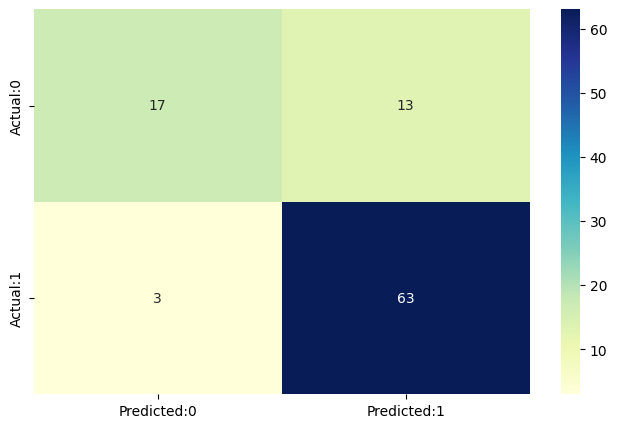

In [32]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [33]:
pred_df = pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred, 'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
189,1,1,0
453,1,1,0
470,1,1,0
45,1,1,0
420,0,1,-1
...,...,...,...
249,1,1,0
165,0,0,0
125,0,0,0
192,1,1,0


In [34]:
pred_df['Difference'].value_counts()

Difference
 0    80
-1    13
 1     3
Name: count, dtype: int64

# * Out of 96 clients, The model predicted 80 client's eligibility correctly and with an accuracy of 83.33%
